In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from itertools import cycle, islice
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

%matplotlib inline

In [3]:
file_one = "../static/data/Draft_data/collegeOne.csv"
file_one_df = pd.read_csv(file_one, encoding="ISO-8859-1")

In [4]:
file_one_df.head()

,Unnamed: 0,Rnd,Pick,Age,To,CareerAV,DraftedAV,GamesPlayed,Pass Completions,Pass Attempts,...,Rushing Yards,Rushing Touchdowns,Receptions,Receiving Yards,Receiving Touchdowns,Solo,Interceptions (DEF),Sacks,College,College_code
0,0,1,1,23.0,2017.0,108.0,61.0,182.0,21.653846,34.653846,...,2.604396,0.043956,0.000000,0.000000,0.000000,0.005495,0.000000,0.000000,USC,251
1,1,1,2,22.0,2005.0,4.0,4.0,15.0,0.000000,0.000000,...,1.133333,0.000000,2.400000,29.333333,0.266667,0.000000,0.000000,0.000000,Michigan St.,134
2,2,1,3,22.0,2016.0,95.0,93.0,193.0,0.000000,0.000000,...,0.279793,0.000000,5.502591,73.497409,0.362694,0.005181,0.000000,0.000000,Miami (FL),131
3,3,1,4,21.0,2008.0,34.0,31.0,92.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.119565,0.000000,0.173913,Kentucky,108
4,4,1,5,25.0,2017.0,71.0,50.0,221.0,0.000000,0.000000,...,0.018100,0.000000,0.000000,0.000000,0.000000,3.389140,0.190045,0.009050,Kansas St.,106


In [5]:
data = file_one_df.drop(["College"], axis=1)
data

,Unnamed: 0,Rnd,Pick,Age,To,CareerAV,DraftedAV,GamesPlayed,Pass Completions,Pass Attempts,...,Rushing Attempts,Rushing Yards,Rushing Touchdowns,Receptions,Receiving Yards,Receiving Touchdowns,Solo,Interceptions (DEF),Sacks,College_code
0,0,1,1,23.0,2017.0,108.0,61.0,182.0,21.653846,34.653846,...,1.653846,2.604396,0.043956,0.000000,0.000000,0.000000,0.005495,0.000000,0.000000,251
1,1,1,2,22.0,2005.0,4.0,4.0,15.0,0.000000,0.000000,...,0.133333,1.133333,0.000000,2.400000,29.333333,0.266667,0.000000,0.000000,0.000000,134
2,2,1,3,22.0,2016.0,95.0,93.0,193.0,0.000000,0.000000,...,0.119171,0.279793,0.000000,5.502591,73.497409,0.362694,0.005181,0.000000,0.000000,131
3,3,1,4,21.0,2008.0,34.0,31.0,92.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.119565,0.000000,0.173913,108
4,4,1,5,25.0,2017.0,71.0,50.0,221.0,0.000000,0.000000,...,0.004525,0.018100,0.000000,0.000000,0.000000,0.000000,3.389140,0.190045,0.009050,106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4140,4583,7,250,22.0,2020.0,1.0,1.0,12.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47
4141,4584,7,251,23.0,2020.0,0.0,0.0,1.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,109
4142,4585,7,252,22.0,2020.0,0.0,0.0,10.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.600000,6.300000,0.000000,0.100000,0.000000,0.000000,69
4143,4587,7,254,24.0,2020.0,1.0,1.0,9.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.444444,0.000000,0.000000,170


In [6]:
X = StandardScaler().fit_transform(data)
X

array([[-1.7363703 , -1.51967849, -1.65794028, ..., -0.38750352,
        -0.40756666,  1.29552451],
       [-1.73561395, -1.51967849, -1.64411752, ..., -0.38750352,
        -0.40756666, -0.14303914],
       [-1.73485759, -1.51967849, -1.63029477, ..., -0.38750352,
        -0.40756666, -0.17992539],
       ...,
       [ 1.73151959,  1.50871927,  1.81157128, ..., -0.38750352,
        -0.40756666, -0.94224117],
       [ 1.7330323 ,  1.50871927,  1.83921679, ..., -0.38750352,
        -0.40756666,  0.29959583],
       [ 1.73378866,  1.50871927,  1.85303955, ..., -0.38750352,
         0.53697494, -0.83158243]])

In [7]:
kmeans = KMeans(n_clusters=12)
model = kmeans.fit(X)
print("model\n", model)

model
 KMeans(n_clusters=12)


In [8]:
centers = model.cluster_centers_
centers

array([[ 1.02773827e-01, -1.21244973e+00, -1.26819868e+00,
        -3.00389988e-01,  8.06843126e-01,  2.32481800e+00,
         2.08258358e+00,  8.97771881e-01,  7.10295787e+00,
         6.81839433e+00,  7.27117100e+00,  7.86832794e+00,
         4.79958132e+00,  1.21964166e+00,  1.31688955e+00,
         1.79917945e+00, -4.17823392e-01, -3.88545233e-01,
        -3.14896619e-01, -7.33623396e-01, -3.87503520e-01,
        -4.07566664e-01, -2.89056089e-02],
       [-8.27133344e-01,  1.08583490e+00,  1.06078397e+00,
         4.69002841e-01, -1.26917278e+00, -5.83771251e-01,
        -5.50703593e-01, -5.46901055e-01, -1.60242864e-01,
        -1.60231565e-01, -1.61411241e-01, -1.55471756e-01,
        -1.44738175e-01, -2.17052746e-01, -2.21871725e-01,
        -2.09098470e-01, -2.83049906e-01, -2.73073720e-01,
        -2.69978800e-01, -2.45710850e-01, -2.40449869e-01,
        -2.35868057e-01,  1.95889625e-02],
       [-6.16158859e-01, -6.08254223e-01, -6.11985318e-01,
         6.53694825e-02,  2.8

In [9]:
# from sklearn.cluster import KMeans
# kmeans = KMeans(n_clusters=12)

# # Fit the model to the data
# kmeans.fit(X)

# # Use the data to predict the clusters
# # save the predictions as `predicted_clusters`
# predicted_clusters = kmeans.predict(X)

In [10]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=12)

In [11]:
kmeans.fit(X)

KMeans(n_clusters=12)

In [12]:
predicted_clusters = kmeans.predict(X)

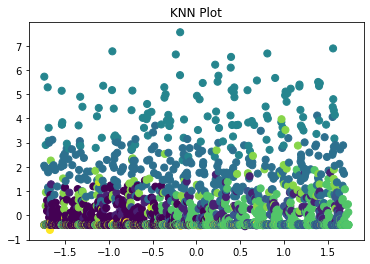

In [13]:
plt.scatter(X[:, 0], X[:, 17], c=predicted_clusters, s=50, cmap='viridis')
plt.title('KNN Plot')
plt.savefig("../Static/images/Graphs/kmeans.png")
plt.show()